In [127]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

titanicpassengers_data = pd.read_excel("/content/drive/MyDrive/TitanicPassengers.xlsx")
titanicpassengers_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Passenger Class,Survived,Name,Sex,Age,Siblings and Spouses,Parents and Children,Ticket #,Fare,Cabin,Port,Lifeboat,Body,Home / Destination,Midpoint age
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",27.5
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",2.5
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.5
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",32.5
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",27.5


In [128]:
# 1st Question:

# 1a)

#Total number of data records found in the dataset is below
titanicpassengers_data.shape

(1309, 15)

In [129]:
# 1b)

# Total number of data records missing values in AGE variable is below
titanicpassengers_data['Age'].isna().sum()

263

In [130]:
# Other variables which are missing in the dataset is below
titanicpassengers_data.columns[titanicpassengers_data.isna().any()]

Index(['Age', 'Fare', 'Cabin', 'Port', 'Lifeboat', 'Body',
       'Home / Destination', 'Midpoint age'],
      dtype='object')

In [131]:
# From the dataset below are the duplicate values found

titanicpassengers_data.duplicated().sum()

0

In [132]:
# 2nd Question:

# Below is the Survived passengers proportion

print("Proportion of the survived passengers:", round(titanicpassengers_data[titanicpassengers_data['Survived'] == 1].shape[0]/titanicpassengers_data.shape[0], 4))

Proportion of the survived passengers: 0.382


In [133]:
# Total age range of the titanic passengers is below

print("Age range of the passengers is from {0} to {1}".format(titanicpassengers_data['Age'].min(), titanicpassengers_data['Age'].max()))

Age range of the passengers is from 0.1667 to 80.0


In [134]:
# Total Majority of Age range of the Titanic passengers is below

pd.DataFrame(titanicpassengers_data["Age"].value_counts()).head(25)

,Age
24.0,47
22.0,43
21.0,41
30.0,40
18.0,39
25.0,34
28.0,32
36.0,31
26.0,30
29.0,30


Text(0.5, 0, 'Survived')

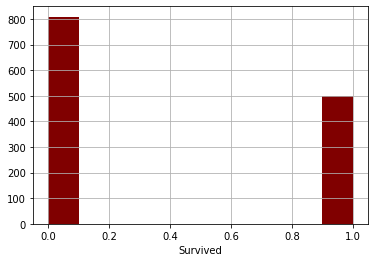

In [135]:
# Below is the graph for "Survived" distribu!on and the "Age" distribution

titanicpassengers_data['Survived'].hist(color = "maroon")
plt.xlabel("Survived")

Text(0.5, 0, 'Age')

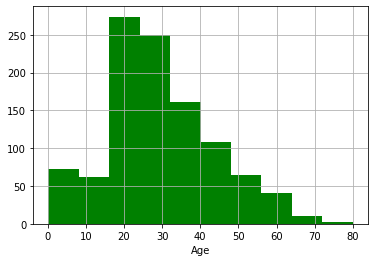

In [136]:
from pyparsing.core import Keyword
titanicpassengers_data['Age'].hist(color = "green")
plt.xlabel("Age")

In [137]:
# 3rd Question

# proportion of first-class passengers compared to the rest
print("First class passengers proportion compared to rest class is {}".
      format(round(titanicpassengers_data['Passenger Class'].value_counts()[1]/titanicpassengers_data.shape[0], 3)))


First class passengers proportion compared to rest class is 0.247


In [138]:
# Most common visited home destination of the Titanic passengers is below

titanicpassengers_data['Home / Destination'].value_counts()

New York, NY                                    64
London                                          14
Montreal, PQ                                    10
Paris, France                                    9
Cornwall / Akron, OH                             9
                                                ..
Chelsea, London                                  1
Harrow-on-the-Hill, Middlesex                    1
Copenhagen, Denmark                              1
Guernsey / Montclair, NJ and/or Toledo, Ohio     1
Antwerp, Belgium / Stanton, OH                   1
Name: Home / Destination, Length: 369, dtype: int64

In [139]:
print("Most common visited home destination of the Titanic passengers is New York, NY.")

Most common visited home destination of the Titanic passengers is New York, NY.


In [140]:
# 4th question

#Logostic regression model

from sklearn.linear_model import LogisticRegression # Logistics Regression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report 

titanicpassengers_data = titanicpassengers_data.replace({'female': 0, 'male': 1})
titanicpassengers_data = titanicpassengers_data.dropna(subset=['Age'])
x = titanicpassengers_data[['Age', 'Passenger Class', 'Sex']]
y = titanicpassengers_data['Survived']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.25, random_state = 0)

log_reg = LogisticRegression()
log_reg.fit(xtrain, ytrain)

y_pred =log_reg.predict(xtest)

print("For this model, AUC score is:", round(roc_auc_score(ytest, y_pred), 3))


For this model, AUC score is: 0.746


In [141]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       157
           1       0.71      0.68      0.69       105

    accuracy                           0.76       262
   macro avg       0.75      0.75      0.75       262
weighted avg       0.76      0.76      0.76       262



In [142]:
# the chance that a female baby (less than 10 years old) first-class passenger survived

print(round((titanicpassengers_data[(titanicpassengers_data['Age'] < 10) & (titanicpassengers_data['Survived'] == 1) & (titanicpassengers_data['Sex'] == 0) & (titanicpassengers_data['Passenger Class'] == 1)].shape[0])/titanicpassengers_data.shape[0], 10))

0.0


In [143]:
# the chance that a female baby (less than 10 years old) third-class passenger survived
print(round((titanicpassengers_data[(titanicpassengers_data['Age'] < 10) & (titanicpassengers_data['Survived'] == 1) & (titanicpassengers_data['Sex'] == 0) & (titanicpassengers_data['Passenger Class'] == 3)].shape[0])/titanicpassengers_data.shape[0], 10))

0.0133843212


In [144]:
# the chance that a 40 years old male first-class passenger survived
print(round((titanicpassengers_data[(titanicpassengers_data['Age'] == 40) & (titanicpassengers_data['Survived'] == 1) & (titanicpassengers_data['Sex'] == 1) & (titanicpassengers_data['Passenger Class'] == 1)].shape[0])/titanicpassengers_data.shape[0], 10))

0.0009560229


In [145]:
# the chance that a 40 years old male third-class passenger survived
print(round((titanicpassengers_data[(titanicpassengers_data['Age'] == 40) & (titanicpassengers_data['Survived'] == 1) & (titanicpassengers_data['Sex'] == 1) & (titanicpassengers_data['Passenger Class'] == 3)].shape[0])/titanicpassengers_data.shape[0], 10))

0.0


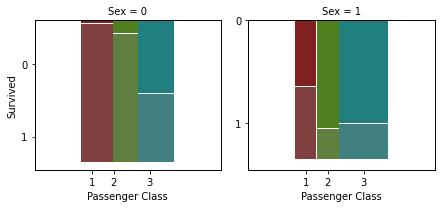

In [146]:
# 5th question

from statsmodels.graphics.mosaicplot import mosaic

def my_mosaic(*args,**kwargs):
    mosaic(kwargs['data'], list(args),
           labelizer=lambda k: '',
           ax=plt.gca())

a = sns.FacetGrid(titanicpassengers_data, col='Sex', col_wrap=10)
a.map(sns.barplot, "Survived", "Passenger Class", order=["Sex=0", "Sex=1"])
a = a.map_dataframe(my_mosaic, 'Passenger Class', 'Survived')

In [147]:
# 6th question

from sklearn.tree import DecisionTreeClassifier

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.30, random_state = 55)
dt_model1 = DecisionTreeClassifier(criterion='entropy', max_depth = 7)
dt_model1.fit(xtrain, ytrain)

dt_pred1 = dt_model1.predict(xtest)
print("AUC score of this model is", round(roc_auc_score(ytest, dt_pred1), 3))

AUC score of this model is 0.726


In [150]:
ft_importance = dt_model1.tree_.compute_feature_importances(normalize=False)
print("Feature Importance = " + str(ft_importance))
print("Age and Sex features are the most important for the decision tree model to predict")

Feature Importance = [0.13485474 0.11921505 0.21343317]
Age and Sex features are the most important for the decision tree model to predict
